<a href="https://colab.research.google.com/github/jclauss24/MTLSA_Project/blob/main/Analysis/arima_residual_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [4]:
resdata = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/selectResidualsFinal_4day_good.csv")
resdata.columns.values[1] = 'IndexValue_NDXT'
resdata.columns.values[2] = 'Volume_GOOGL'
resdata.columns.values[7] = 'NetChange_NDXT'
resdata.columns.values[8] = 'High_NDXT'
resdata.columns.values[9] = 'Low_NDXT'
resdata.columns.values[10] = 'Close/Last_GOOGL'
resdata.columns.values[11] = 'Open_GOOGL'
resdata.columns.values[12] = 'Low_GOOGL'
resdata.columns.values[13] = 'Close/Last_AAPL'
resdata.columns.values[14] = 'Open_AAPL'
resdata.columns.values[15] = 'Low_AAPL'

In [5]:
preddata = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/selectPredictionsFinal_4day_good.csv')
preddata.columns

Index(['Unnamed: 0', '# IndexValue_NDXT', ' Volume_GOOGL', 'Volume_AAPL',
       'CPI', 'High_GOOGL', 'High_AAPL', ' NetChange_NDXT', ' High_NDXT',
       ' Low_NDXT', ' Close/Last_GOOGL', ' Open_GOOGL', ' Low_GOOGL',
       ' Close/Last_AAPL', ' Open_AAPL', 'Low_AAPL'],
      dtype='object')

In [6]:
preddata = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/selectPredictionsFinal_4day.csv')
preddata.columns.values[1] = 'IndexValue_NDXT'
preddata.columns.values[2] = 'Volume_GOOGL'
preddata.columns.values[7] = 'NetChange_NDXT'
preddata.columns.values[8] = 'High_NDXT'
preddata.columns.values[9] = 'Low_NDXT'
preddata.columns.values[10] = 'Close/Last_GOOGL'
preddata.columns.values[11] = 'Open_GOOGL'
preddata.columns.values[12] = 'Low_GOOGL'
preddata.columns.values[13] = 'Close/Last_AAPL'
preddata.columns.values[14] = 'Open_AAPL'
preddata.head()

Unnamed: 0  IndexValue_NDXT  Volume_GOOGL   Volume_AAPL         CPI  \
0           0      2385.403694  3.012626e+07  1.180310e+08  236.599120   
1           1      2444.414332  3.497865e+07  2.082681e+08  236.599214   
2           2      2389.235487  5.945499e+07  1.071347e+08  236.599348   
3           3      2369.412088  4.668743e+07  1.439850e+08  236.599395   
4           4      2340.742143  3.504923e+07  1.416507e+08  236.599308   

   High_GOOGL  High_AAPL  NetChange_NDXT    High_NDXT     Low_NDXT  \
0   28.201860  31.238980       33.918708  2386.372392  2362.857651   
1   28.398589  32.304323       26.134420  2454.411196  2434.920384   
2   29.225750  31.953297       -0.791579  2413.615834  2391.040627   
3   28.385796  31.590770        5.210443  2375.471665  2351.028818   
4   27.912310  31.176605        1.510374  2340.770033  2319.727579   

   Close/Last_GOOGL  Open_GOOGL  Low_GOOGL  Close/Last_AAPL  Open_AAPL  \
0         28.100118   30.971055  27.575501        31.238980  30.971055   
1         28.284939   32.296779  28.312753        32.304323  32.296779   
2         28.955972   31.747883  28.400880        31.953297  31.747883   
3         28.080570   31.461353  27.797062        31.590770  31.461353   
4         27.482039   31.118920  27.268350        31.176605  31.118920   

    Low_AAPL   Low_AAPL  
0  99.736232        NaN  
1  99.736232  30.717751  
2  99.736232  31.454748  
3  99.736232  31.713085  
4  99.736232  31.070849

In [7]:
mainData = pd.read_csv('https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data_4day.csv')
mainData.head()

Date      CPI  IndexValue_NDXT  NetChange_NDXT    High_NDXT  \
0  2015-03-16  236.599      2384.351959       34.024568  2385.589570   
1  2015-03-20  236.599      2431.813822       24.085556  2438.290063   
2  2015-03-24  236.599      2401.919857      -16.423713  2422.963888   
3  2015-03-28  236.599      2372.316084      -13.033901  2385.998228   
4  2015-04-01  236.599      2342.712311       -9.644089  2349.032568   

      Low_NDXT  Close/Last_GOOGL  Volume_GOOGL  Open_GOOGL  High_GOOGL  \
0  2362.563697          28.08200    36818620.0    30.97000     28.1875   
1  2419.281267          28.24750    44255280.0    32.06250     28.3550   
2  2401.826579          28.87700    79040060.0    31.80750     29.0940   
3  2363.860982          28.17575    58884350.0    31.50625     28.5095   
4  2325.895386          27.47450    38728640.0    31.20500     27.9250   

   Low_GOOGL  Close/Last_AAPL  Volume_AAPL  Open_AAPL  High_AAPL  Low_AAPL  
0    27.5660          31.2375  143265200.0   30.97000    31.2375   30.7175  
1    28.2240          32.1000  274064720.0   32.06250    32.1000   31.2900  
2    28.4045          32.0100  130988800.0   31.80750    32.0100   31.6400  
3    27.8530          31.6450  146420680.0   31.50625    31.6450   31.2075  
4    27.3015          31.2800  161852560.0   31.20500    31.2800   30.7750

In [8]:
mainData["Date"] = pd.to_datetime(mainData["Date"])

Index(['Date', 'CPI', 'IndexValue_NDXT', 'NetChange_NDXT', 'High_NDXT',
       'Low_NDXT', 'Close/Last_GOOGL', 'Volume_GOOGL', 'Open_GOOGL',
       'High_GOOGL', 'Low_GOOGL', 'Close/Last_AAPL', 'Volume_AAPL',
       'Open_AAPL', 'High_AAPL', 'Low_AAPL'],
      dtype='object')


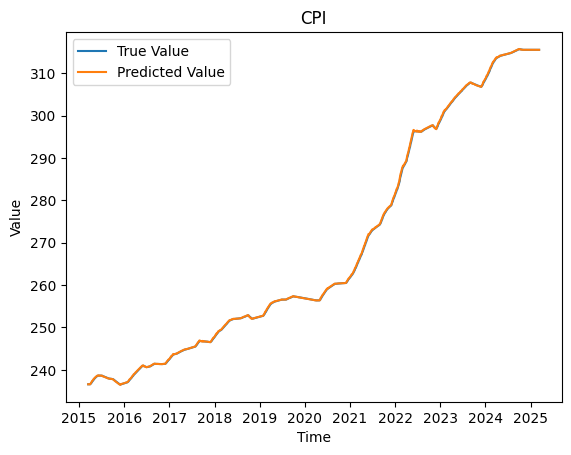

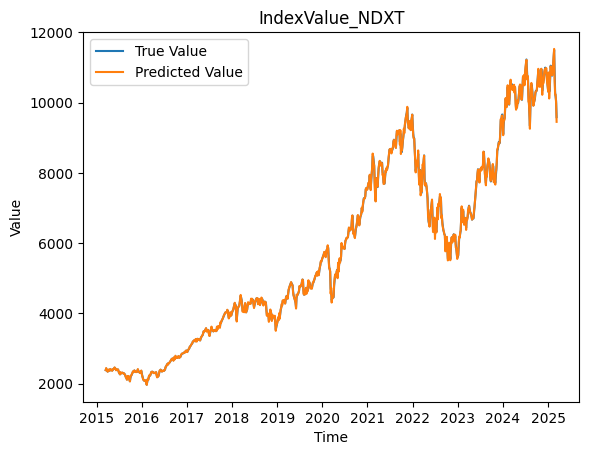

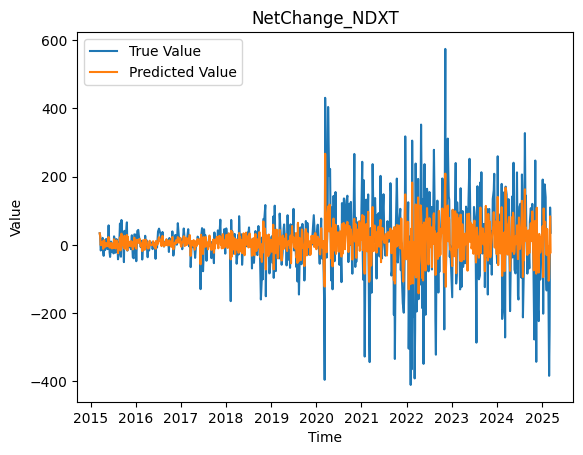

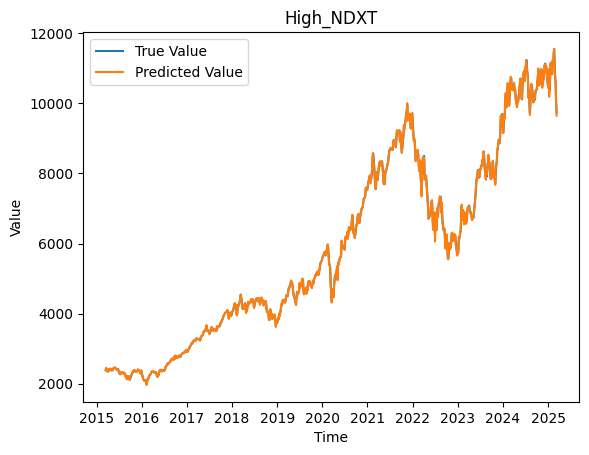

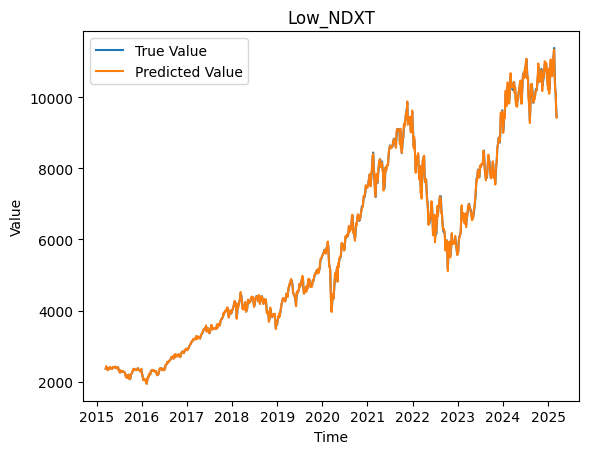

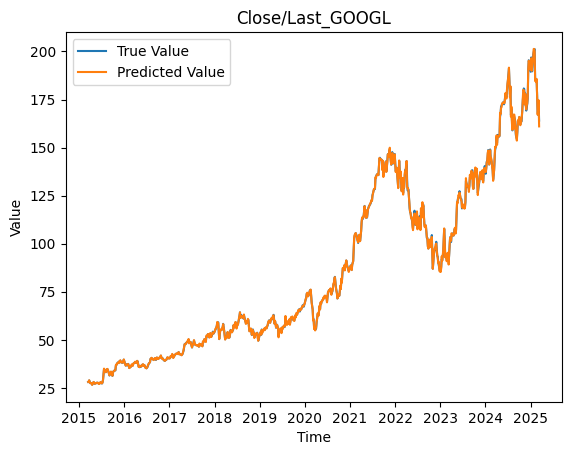

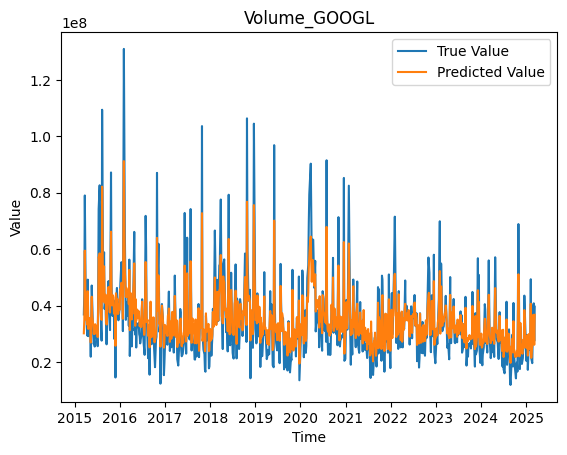

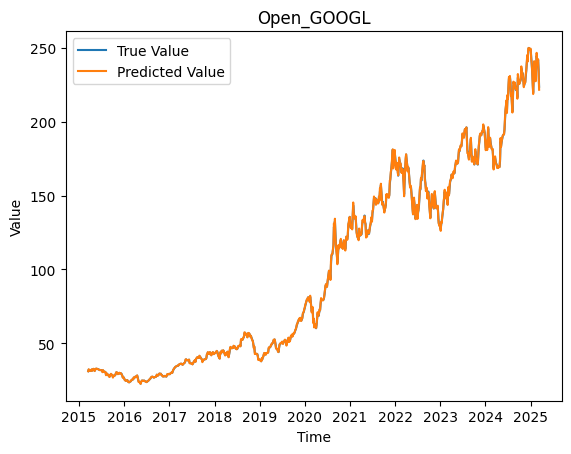

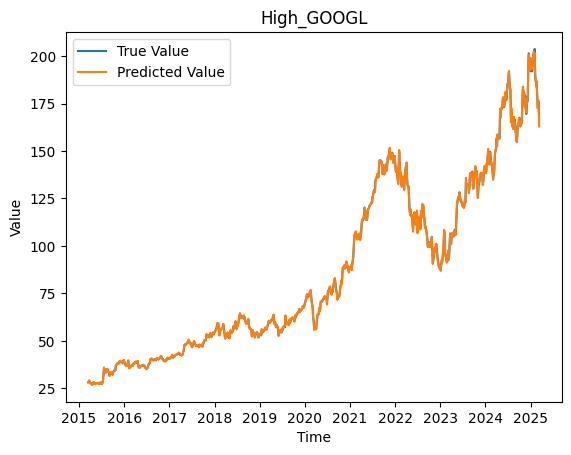

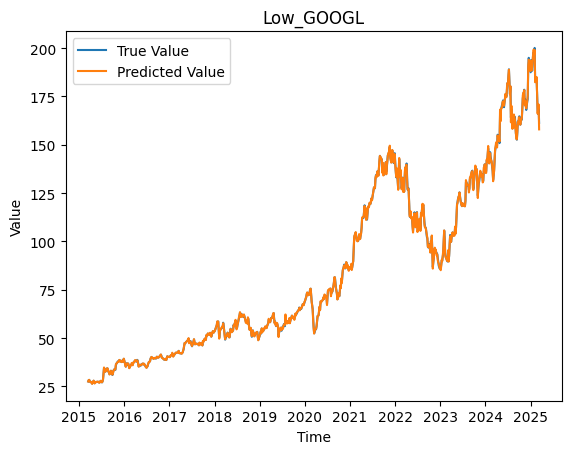

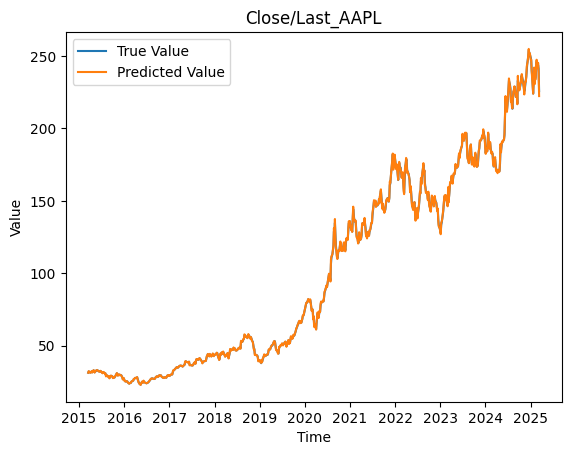

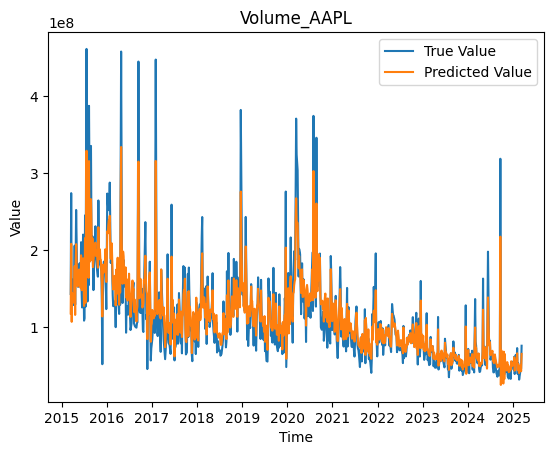

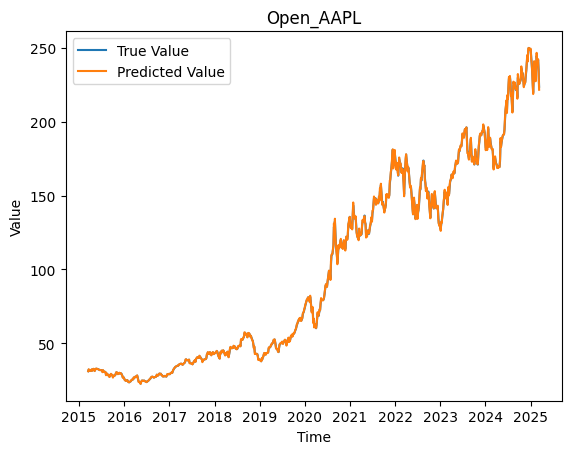

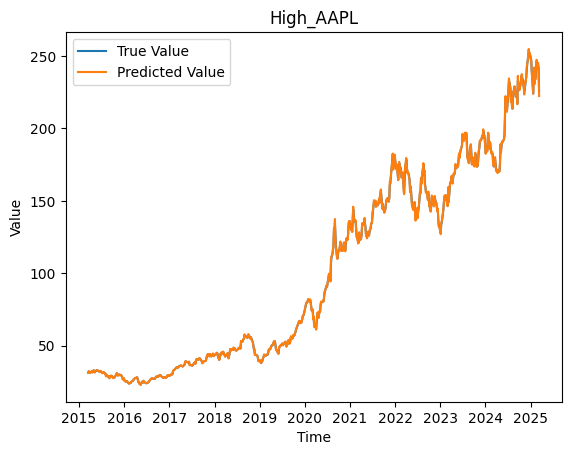

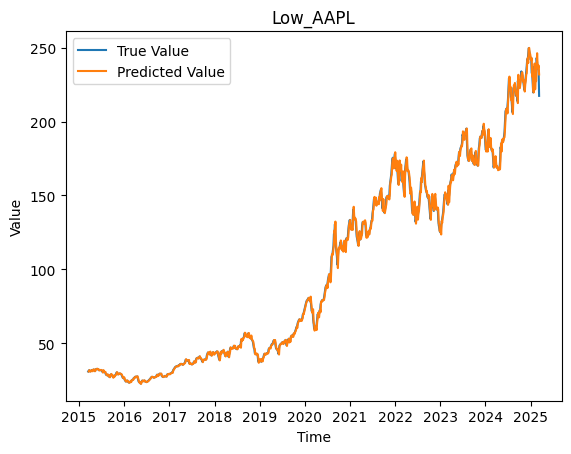

In [10]:
col_names = mainData.columns
x = mainData["Date"]
print(col_names)
for col in col_names[1:]:
  # columnName = data.columns[i]
  y = mainData[col]

  y1 = preddata[col]

  plt.plot(x, y, label='True Value')
  plt.plot(x, y1, label='Predicted Value')

  plt.title(col)
  plt.ylabel('Value')
  plt.xlabel('Time')
  plt.legend()
  plt.show()

### Residual Plots:

Index(['Unnamed: 0', 'IndexValue_NDXT', 'Volume_GOOGL', 'Volume_AAPL', 'CPI',
       'High_GOOGL', 'High_AAPL', 'NetChange_NDXT', 'High_NDXT', 'Low_NDXT',
       'Close/Last_GOOGL', 'Open_GOOGL', 'Low_GOOGL', 'Close/Last_AAPL',
       'Open_AAPL', 'Low_AAPL'],
      dtype='object')


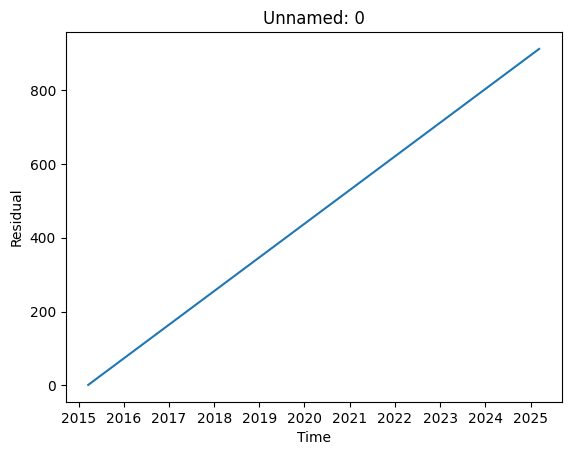

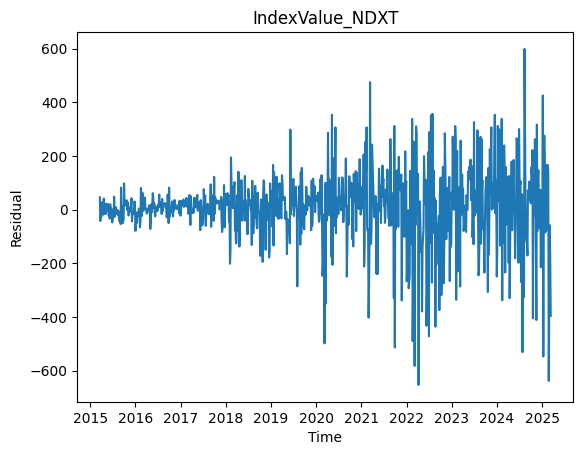

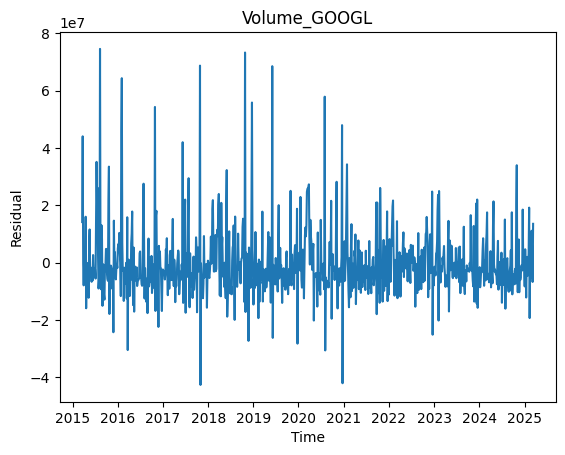

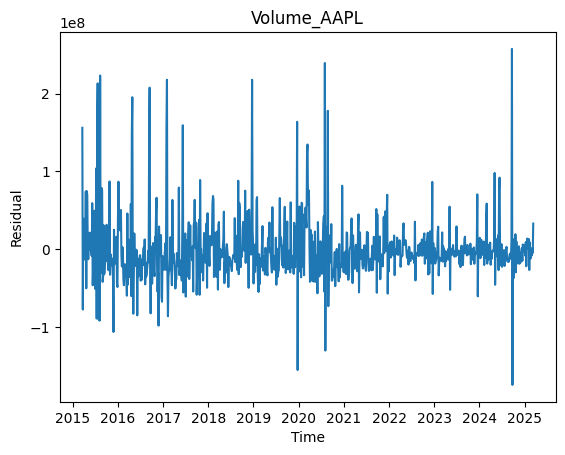

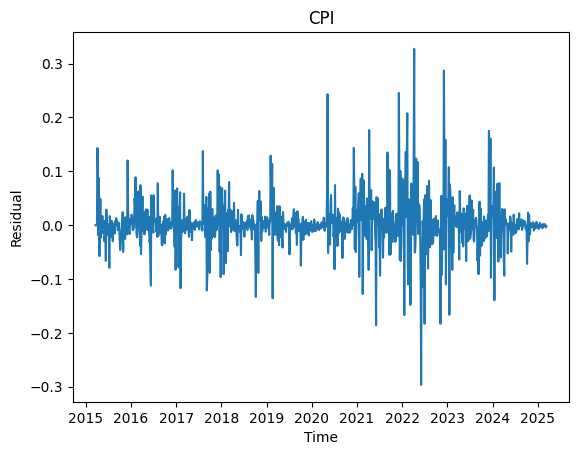

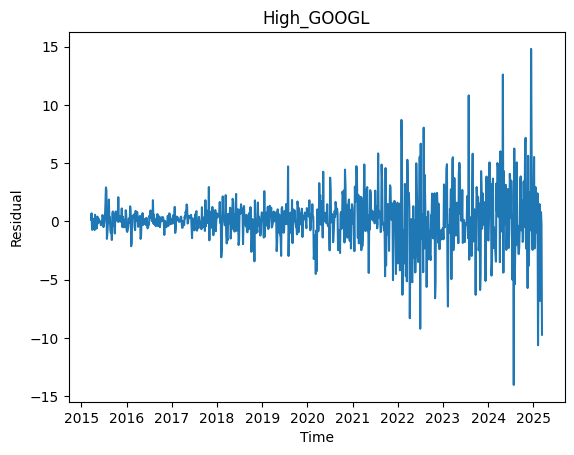

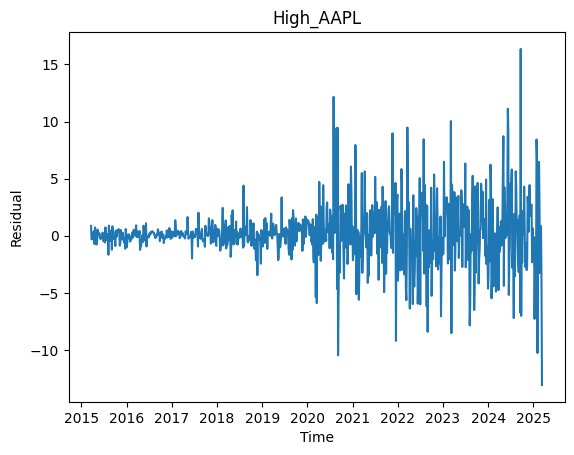

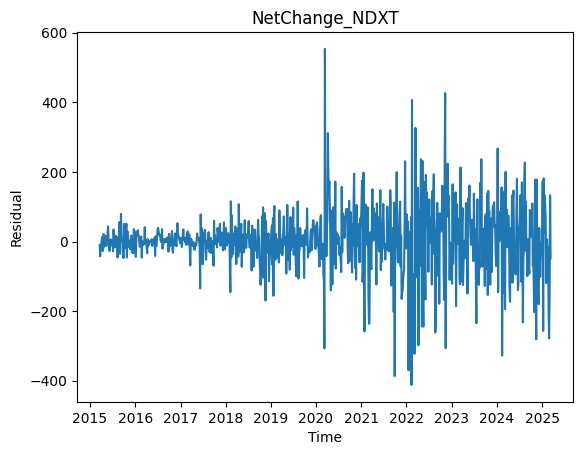

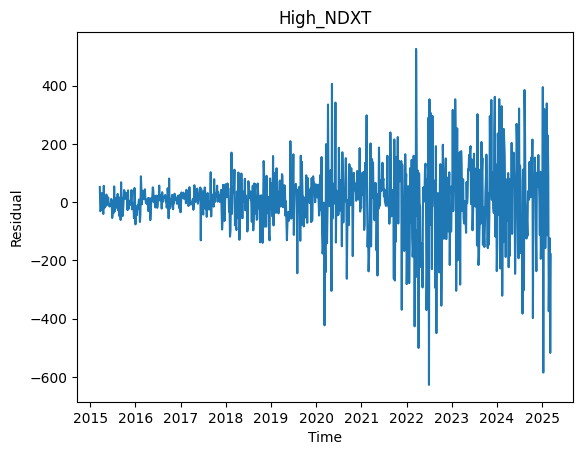

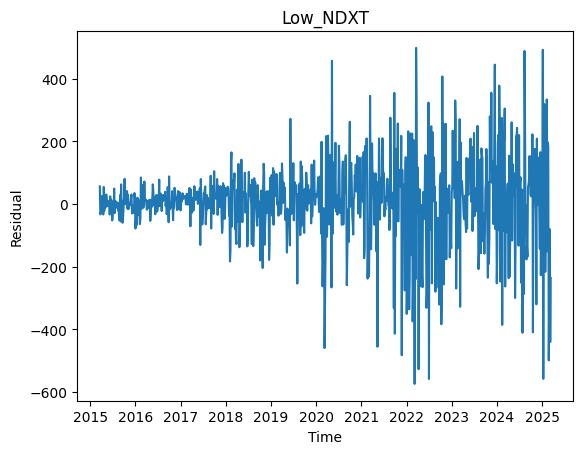

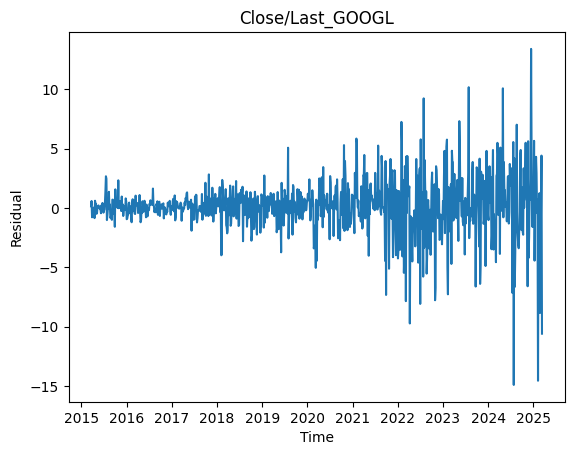

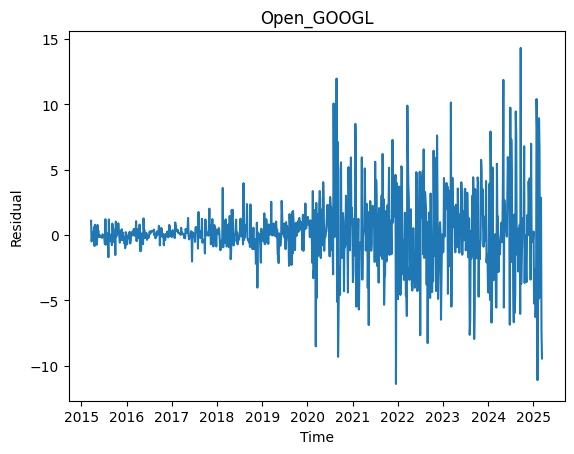

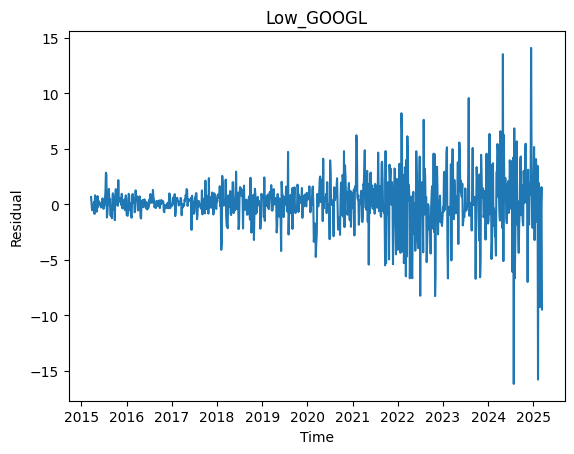

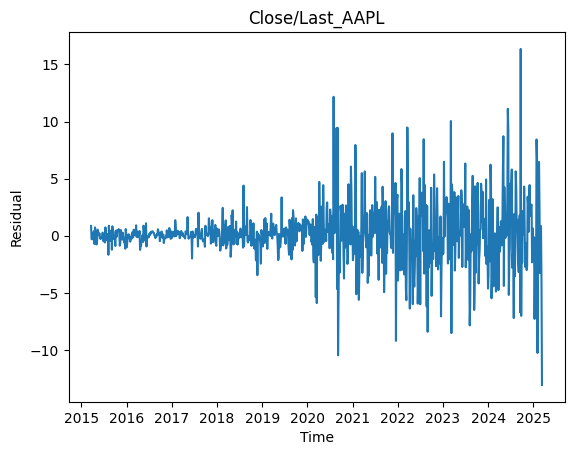

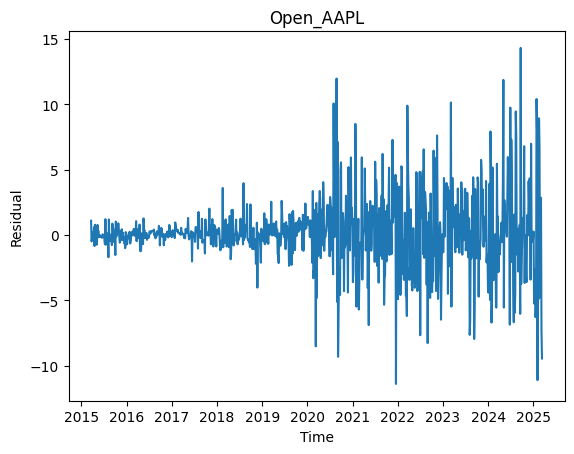

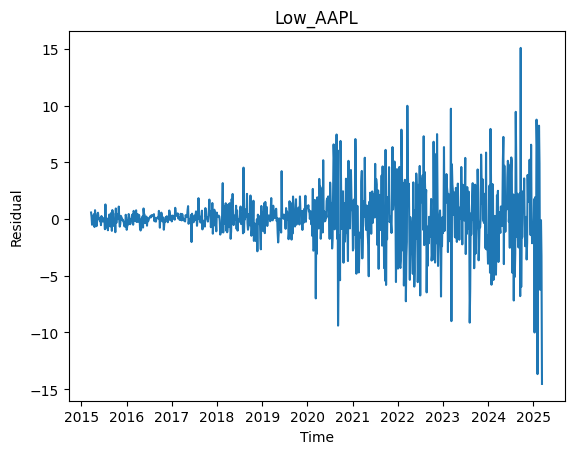

In [11]:
tVals = mainData.loc[1:, "Date"]#np.arange(0, len(data['CPI']), 1)
col_names = resdata.columns

print(col_names)
for col in col_names:
  # columnName = data.columns[i]
  residualData = resdata[col]

  plt.plot(tVals, residualData)
  plt.title(col)
  plt.ylabel('Residual')
  plt.xlabel('Time')
  plt.show()

### Percentage Residual:

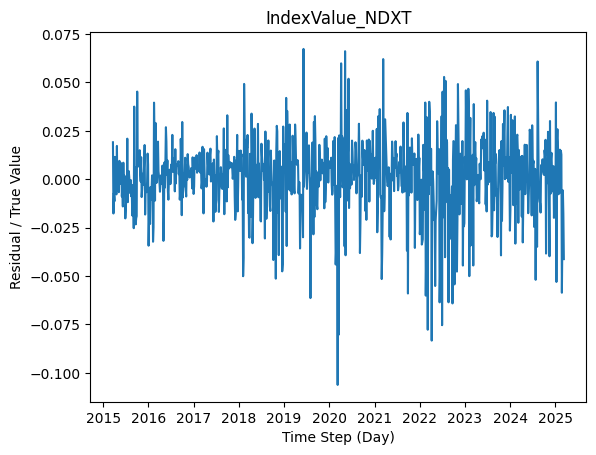

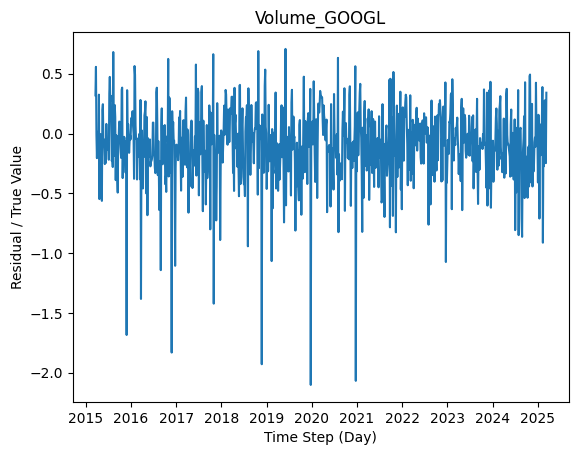

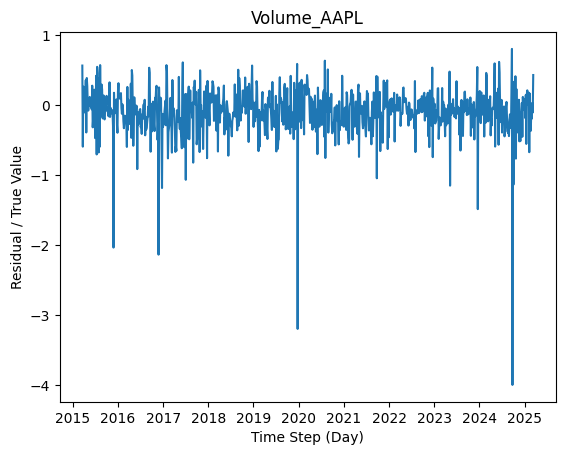

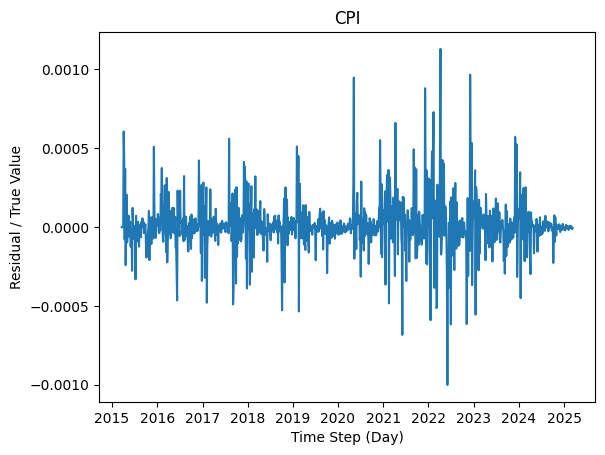

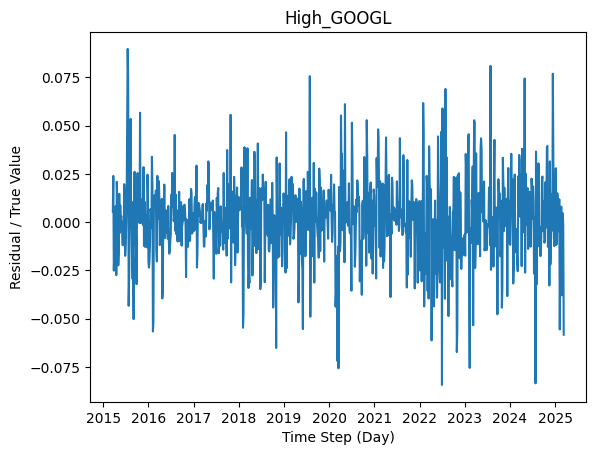

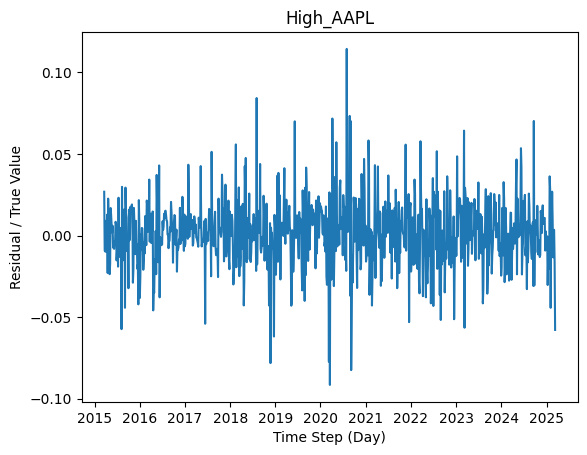

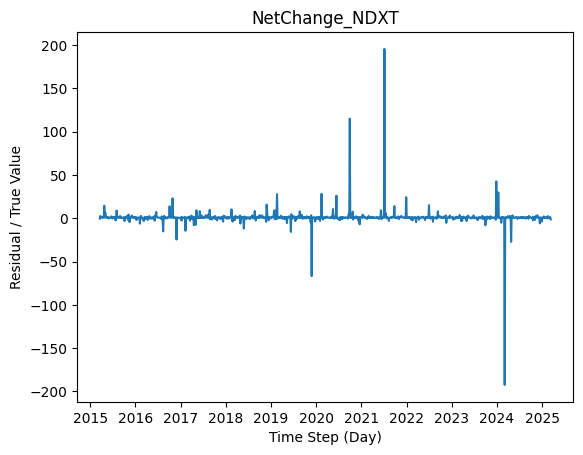

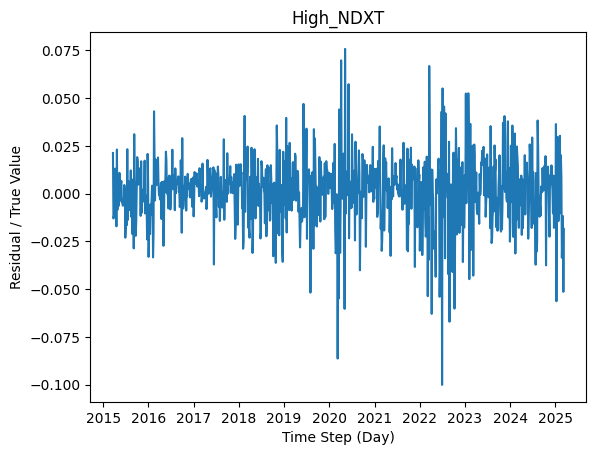

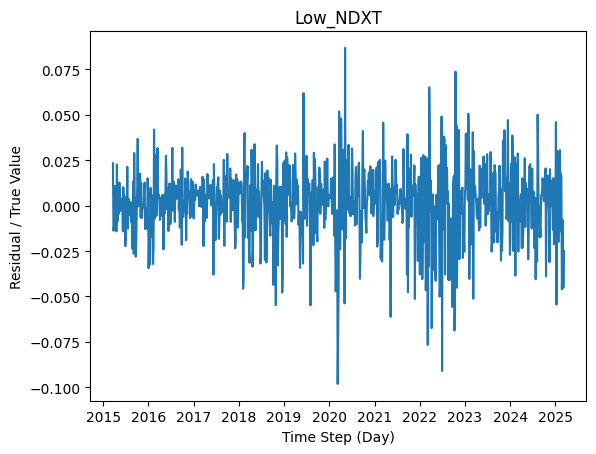

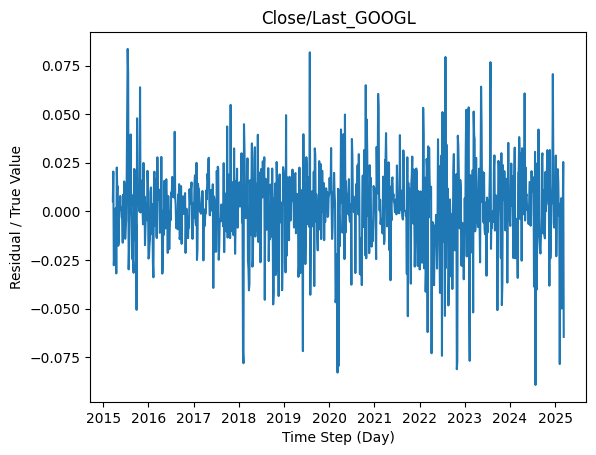

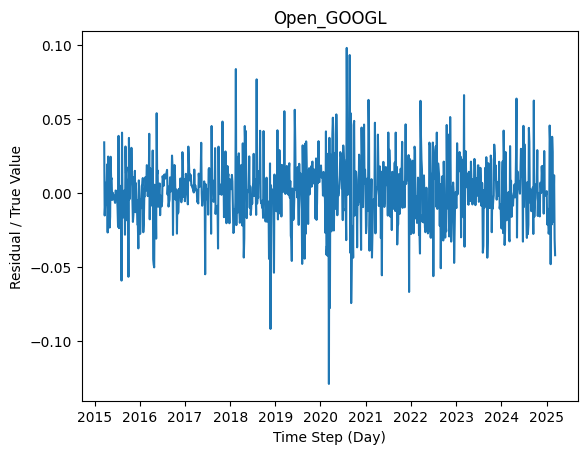

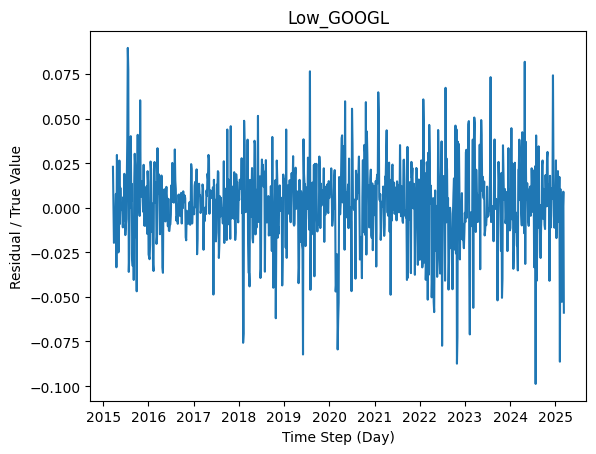

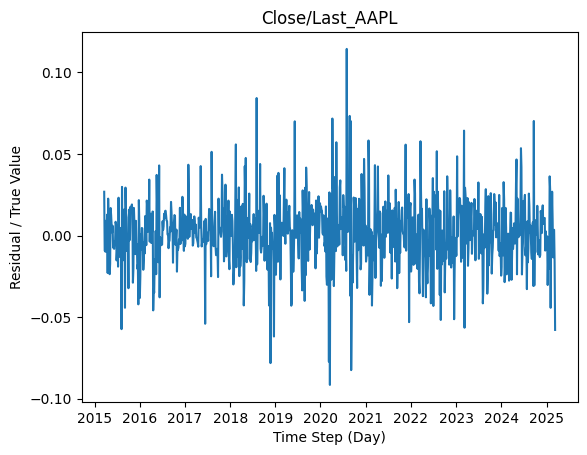

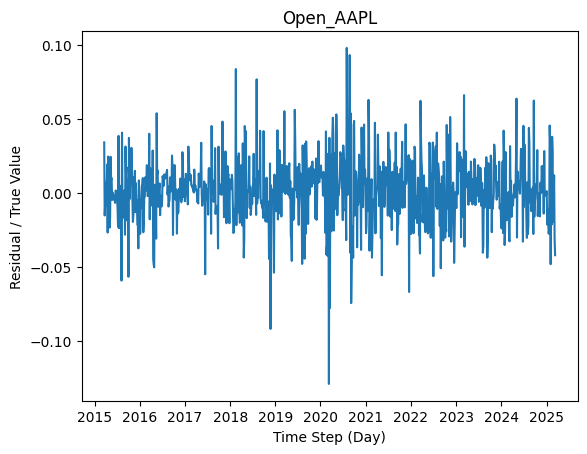

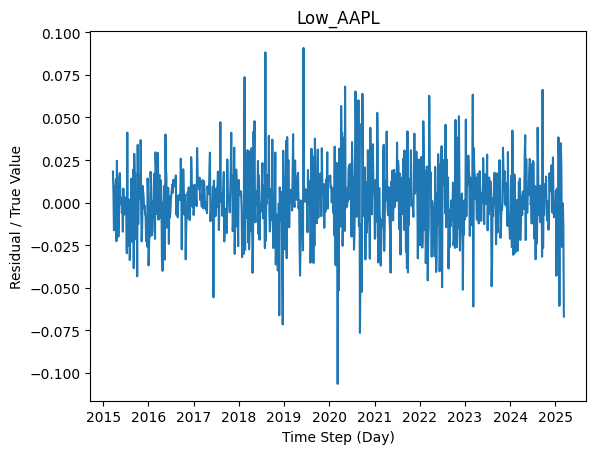

In [ ]:
for i in range(len(resdata.columns)-1):
  columnName = resdata.columns[i+1]
  residualData = resdata[columnName].values
  percentResidual = residualData / mainData[columnName][1:].values

  plt.plot(tVals, percentResidual)
  plt.title(columnName)
  plt.ylabel('Residual / True Value')
  plt.xlabel('Time Step (Day)')
  plt.show()

### Power Spectrum Plots:

In [ ]:
np.unique(mainData["Date"].diff(), return_counts=True)

(array([345600000000000,           'NaT'], dtype='timedelta64[ns]'),
 array([912,   1]))

In [39]:
resdata1 = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/selectResidualsFinal_4day.csv")

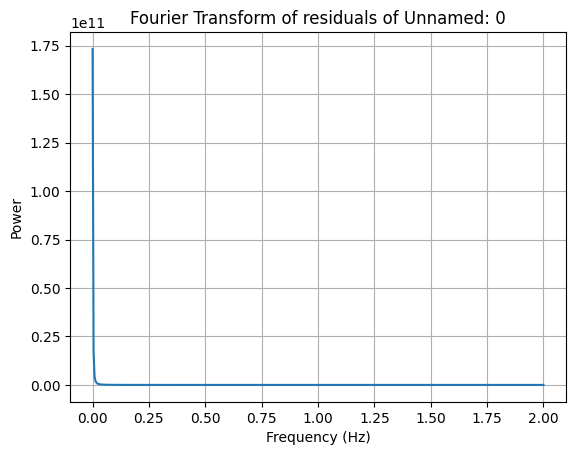

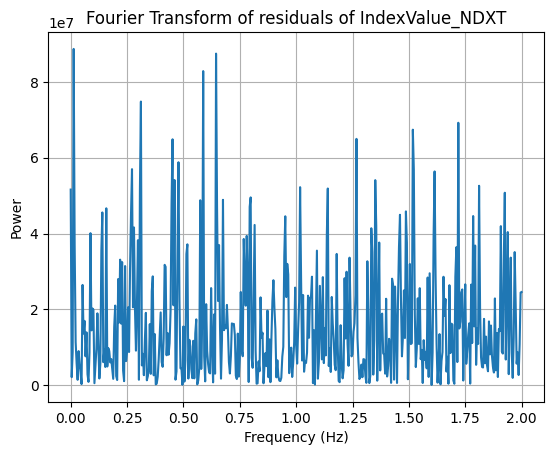

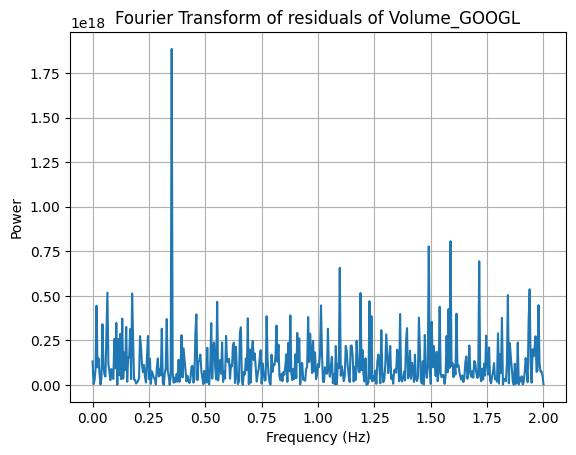

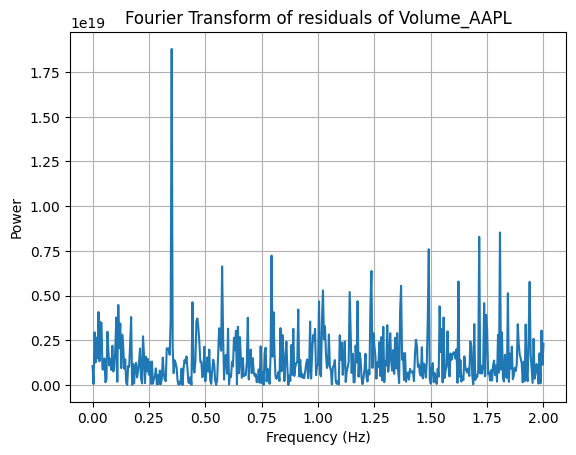

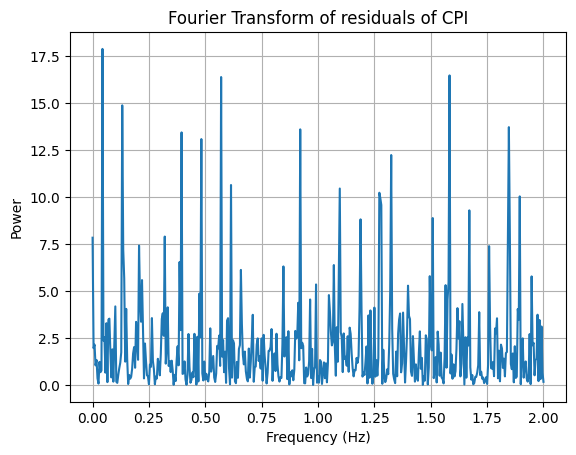

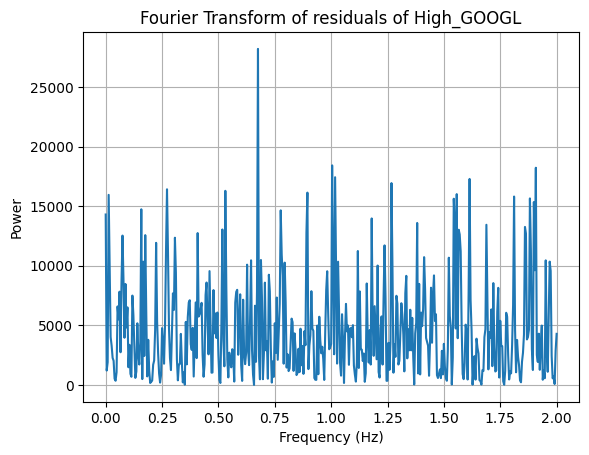

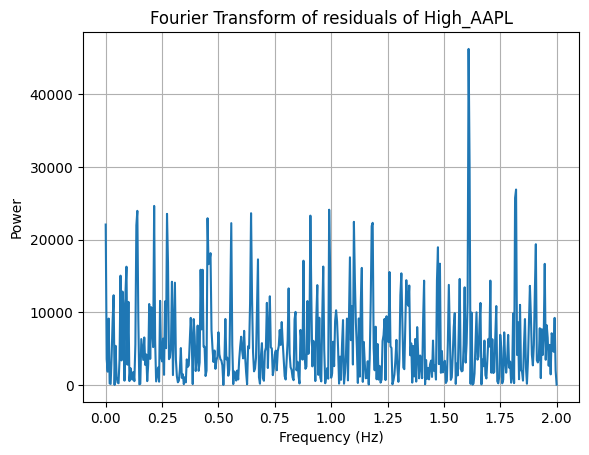

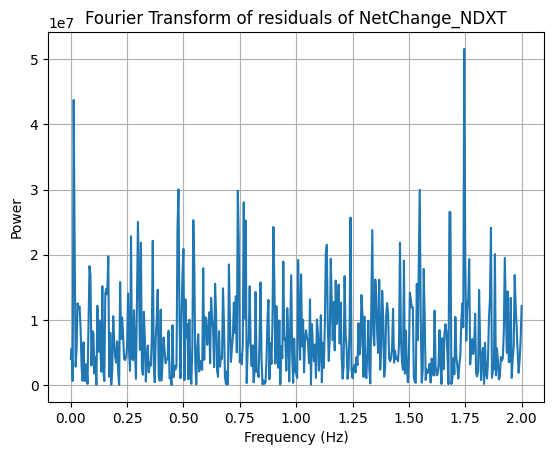

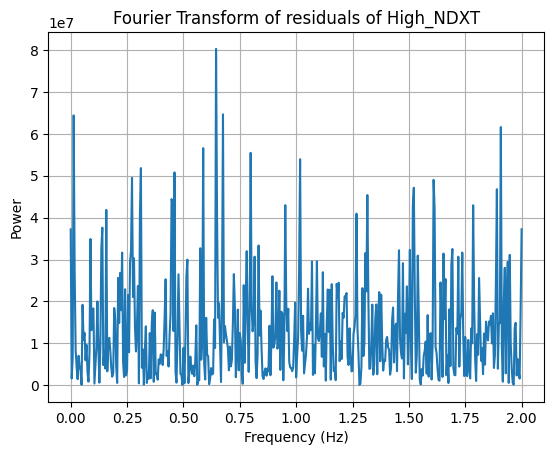

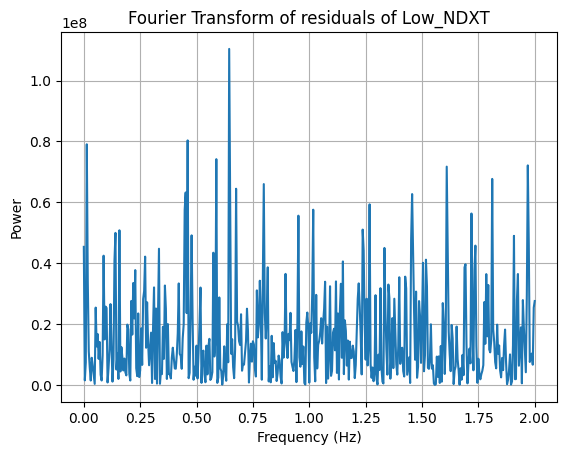

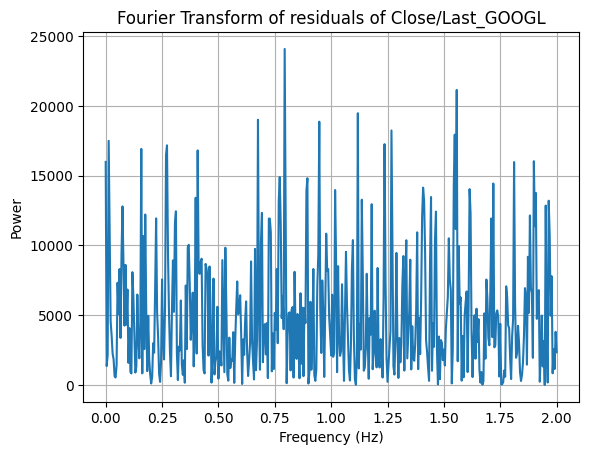

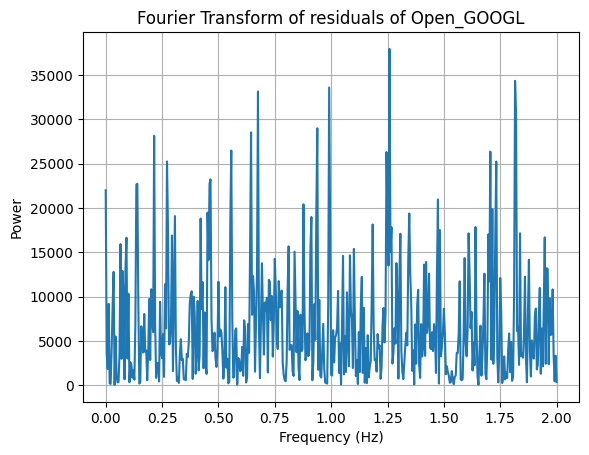

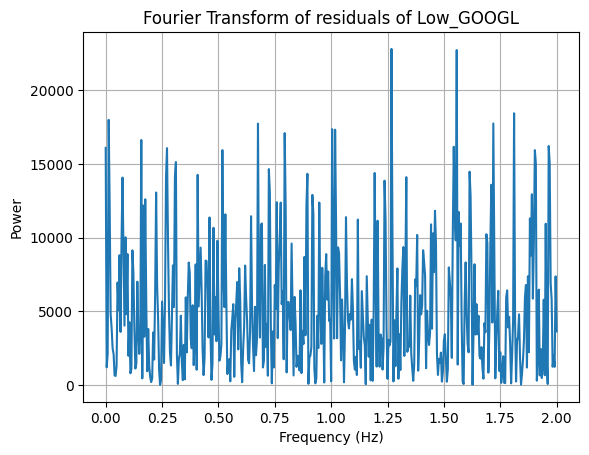

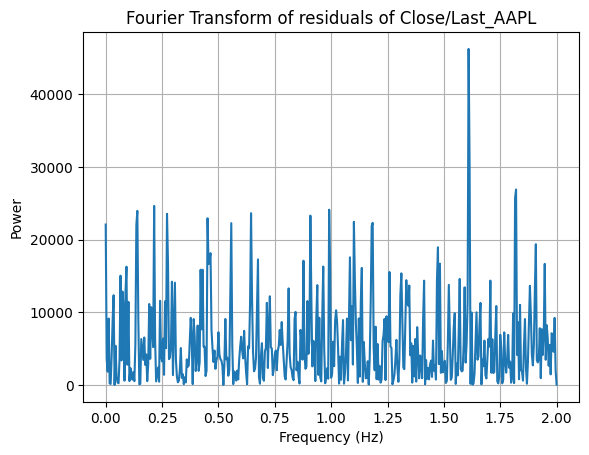

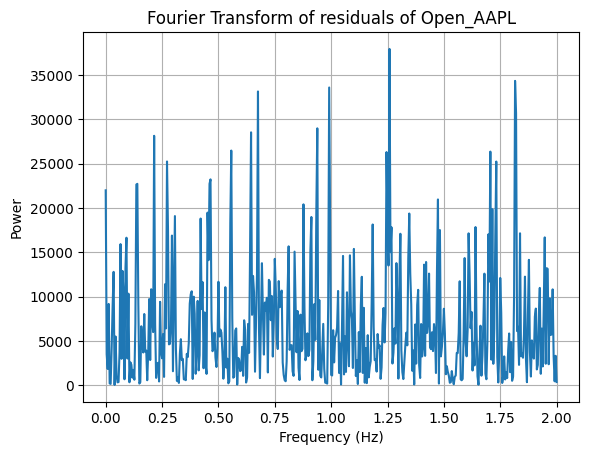

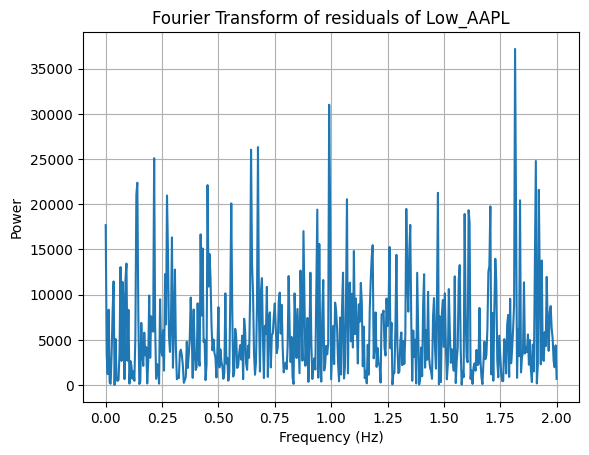

In [43]:

for col in resdata.columns:
  residuals = resdata[col].values

  # Number of samples
  N = len(residuals)

  # Sample spacing (assuming data is evenly spaced in time)
  # Replace 1 with your actual sample spacing if known
  T = 1

  # this is the frequency of our data points in 1/days
  SAMPLE_RATE = 0.00001157407 * 60 * 60 * 24 * 4

  yf = rfft(residuals)
  xf = rfftfreq(N, 1 / SAMPLE_RATE)

  #plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
  plt.plot(xf,  np.abs(yf)**2)
  plt.title("Fourier Transform of residuals of "+col)
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Power")
  plt.grid()
  plt.show()

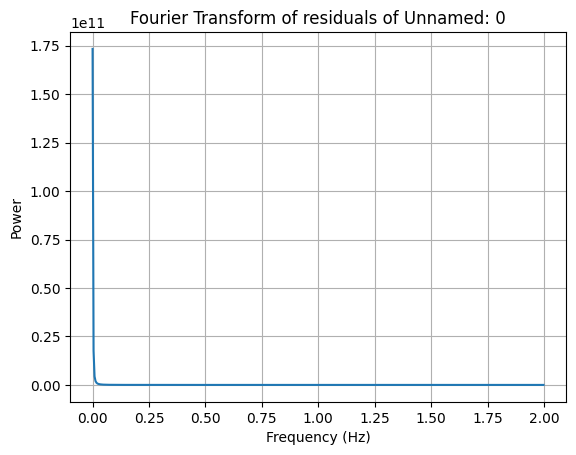

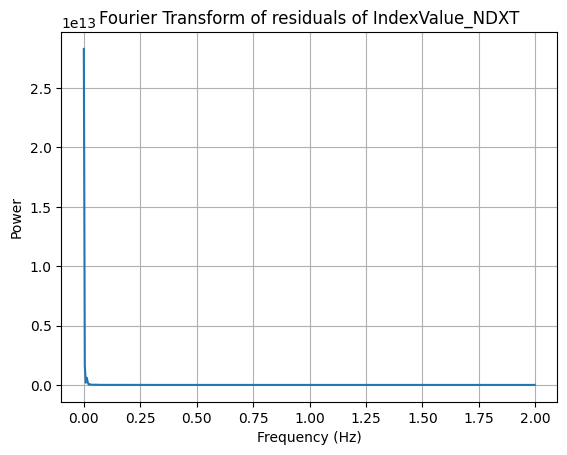

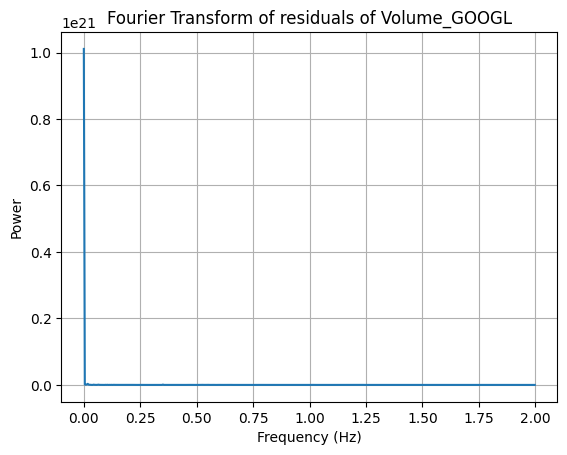

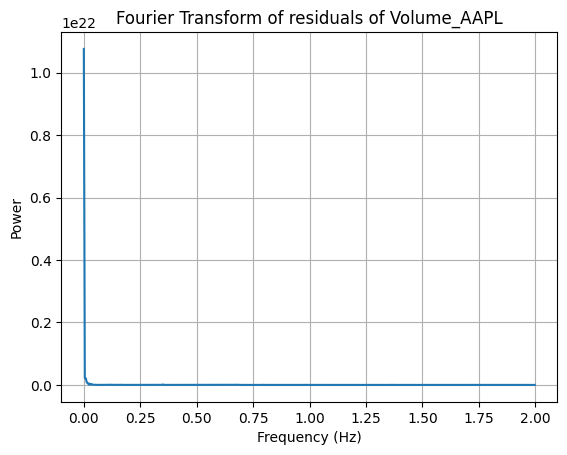

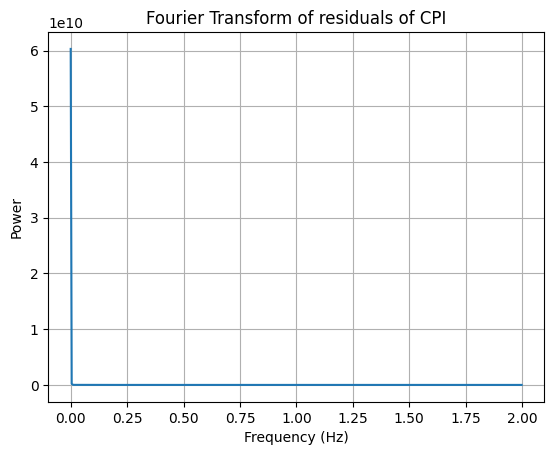

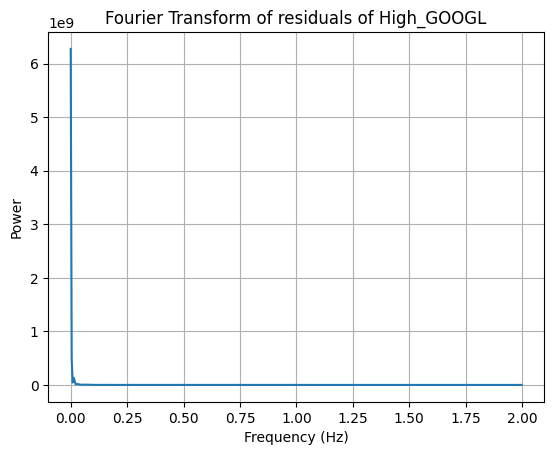

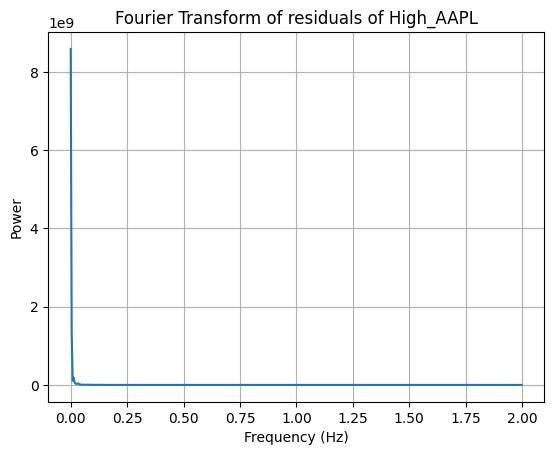

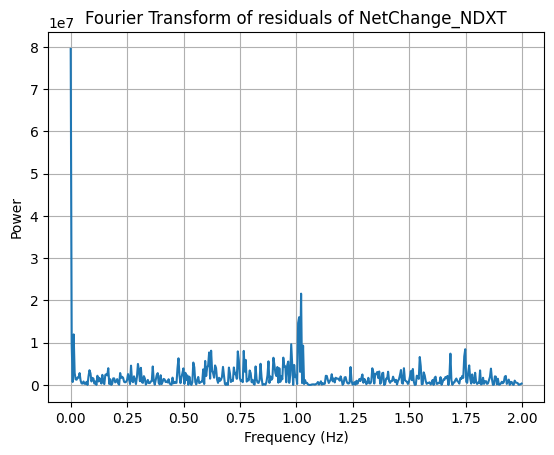

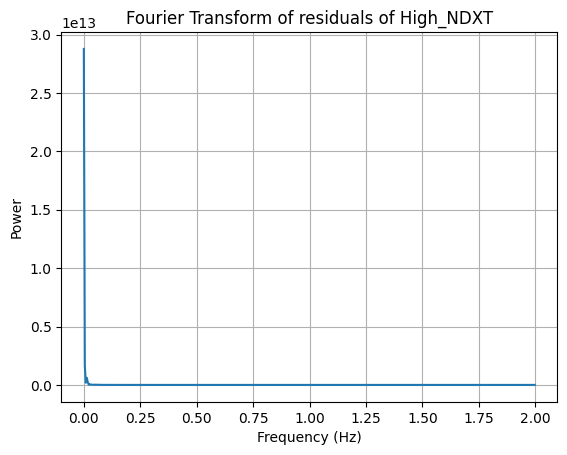

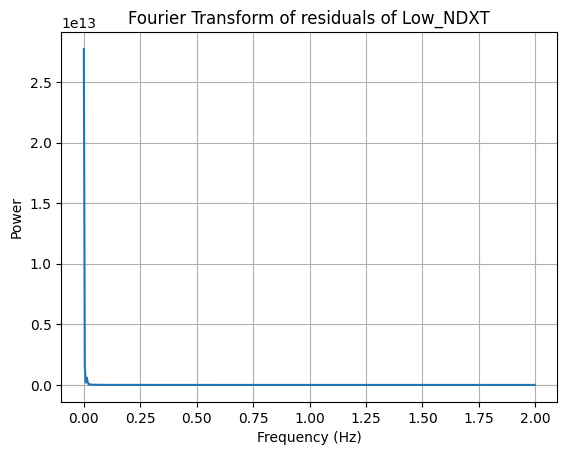

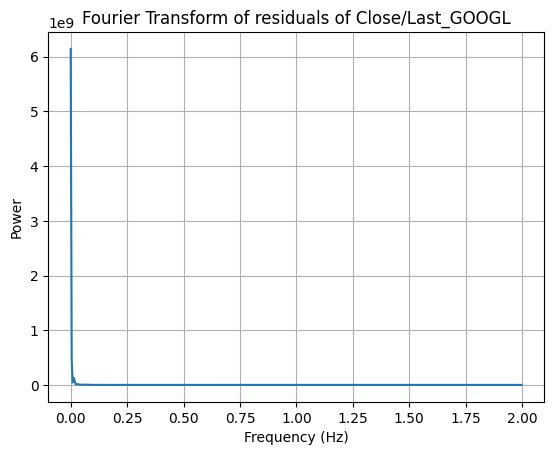

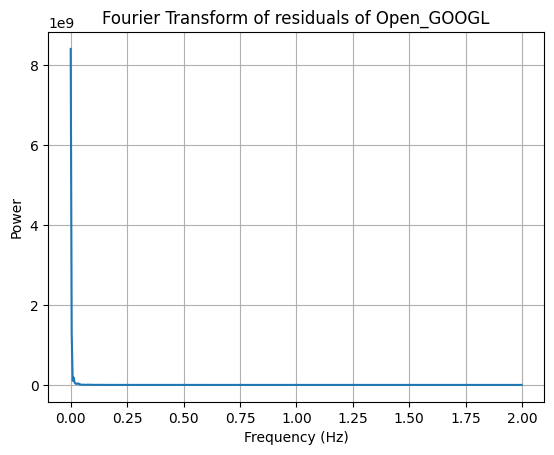

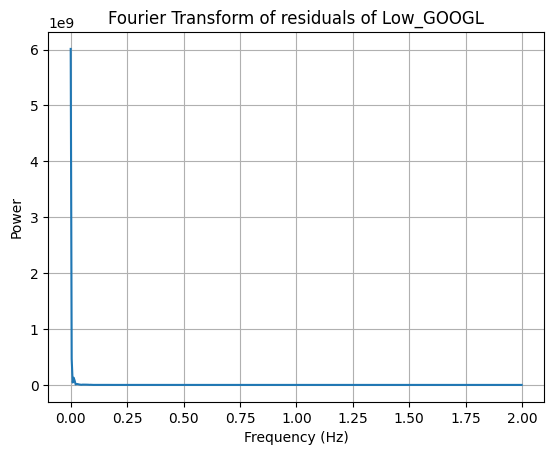

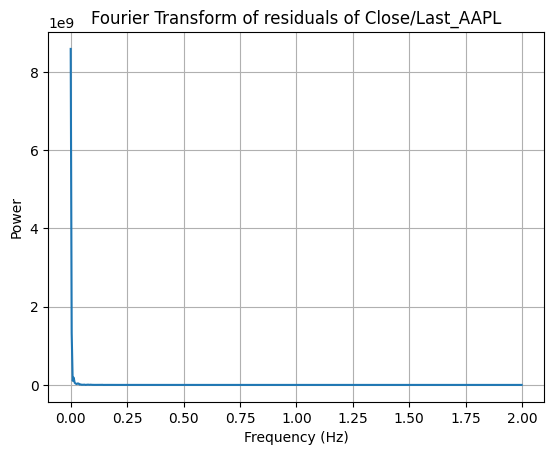

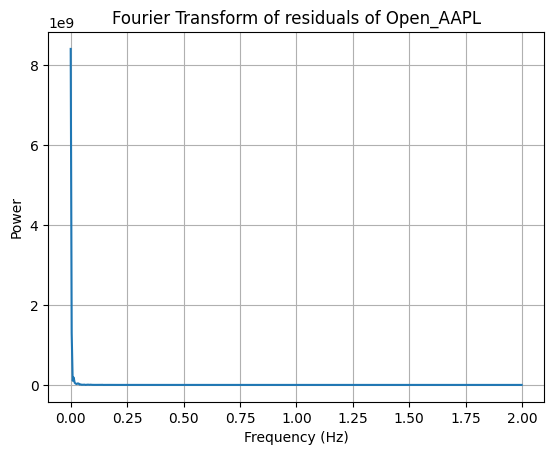

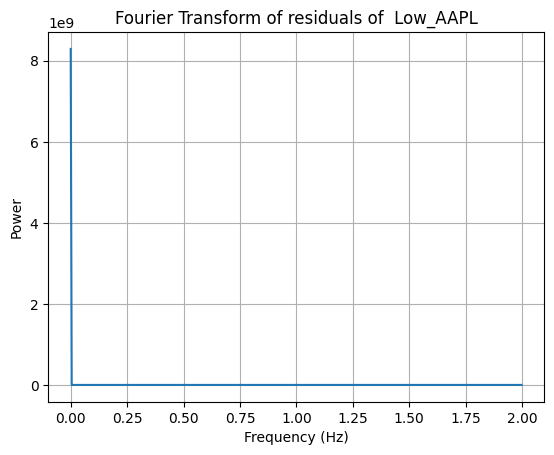

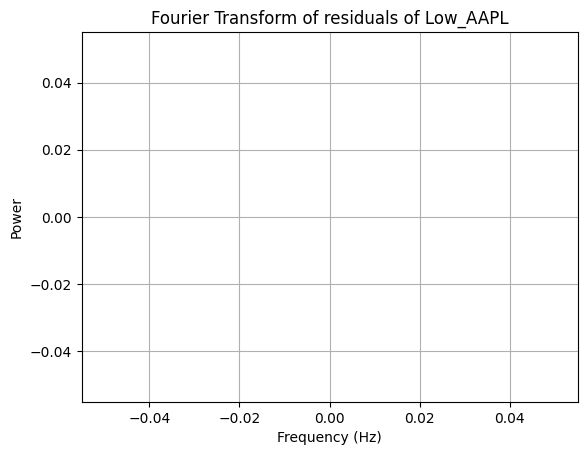

In [45]:
for col in preddata.columns:
  residuals = preddata[col].values

  # Number of samples
  N = len(residuals)

  # Sample spacing (assuming data is evenly spaced in time)
  # Replace 1 with your actual sample spacing if known
  T = 1

  # this is the frequency of our data points in 1/days
  SAMPLE_RATE = 0.00001157407 * 60 * 60 * 24 * 4

  yf = rfft(residuals)
  xf = rfftfreq(N, 1 / SAMPLE_RATE)

  #plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
  plt.plot(xf,  np.abs(yf)**2)
  plt.title("Fourier Transform of "+col)
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Power")
  plt.grid()
  plt.show()

### Smoothed Residual Plots:
plotting the moving average of the residual

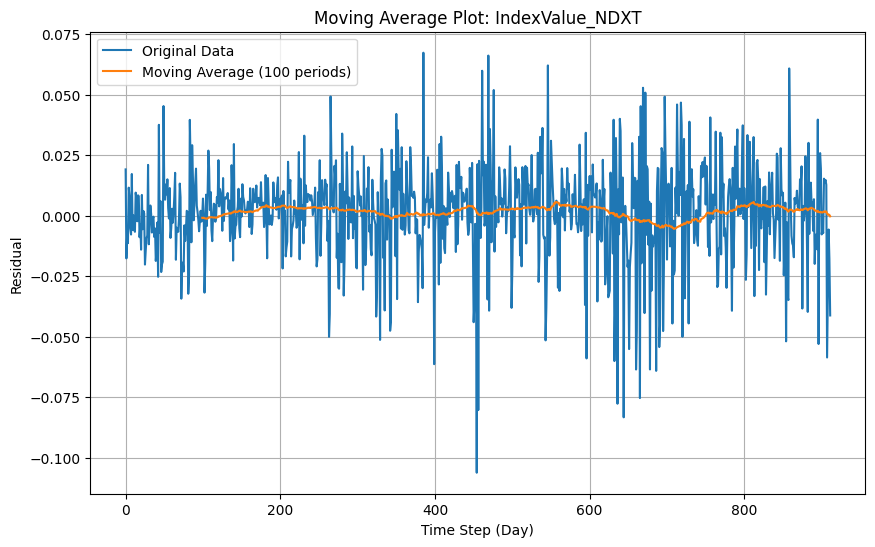

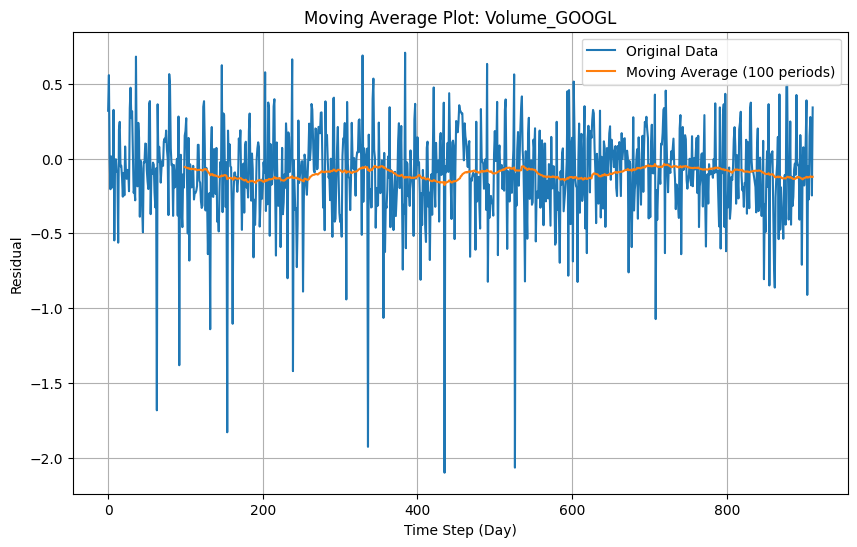

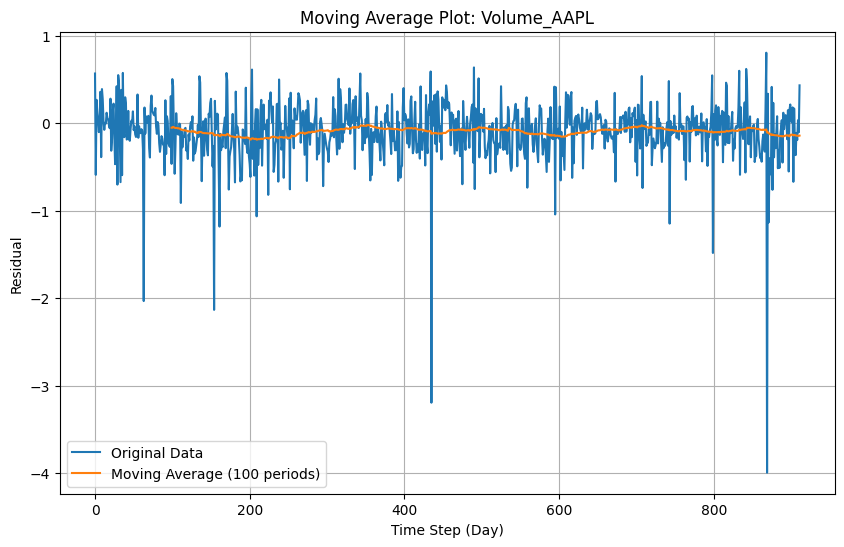

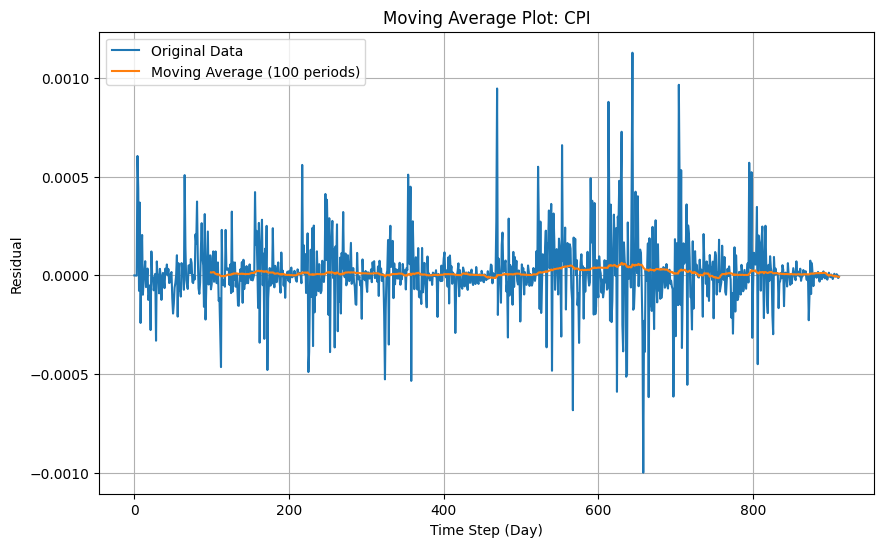

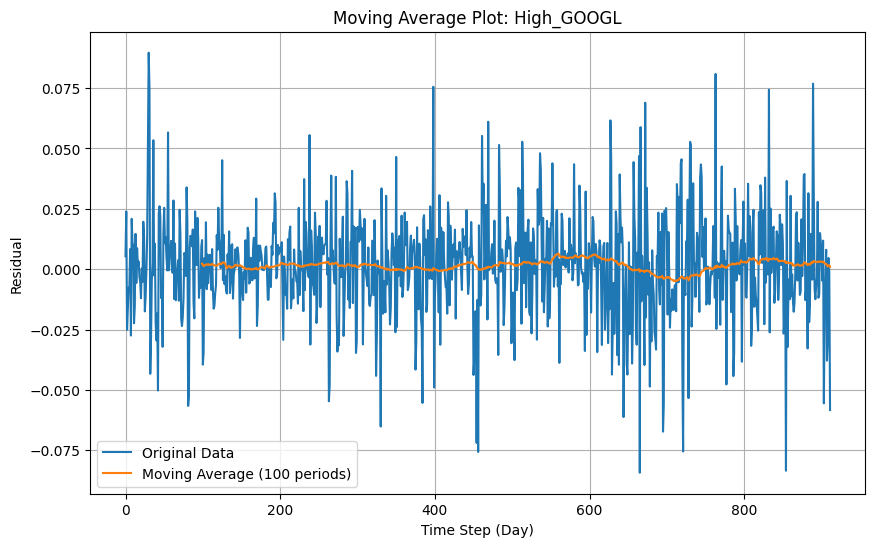

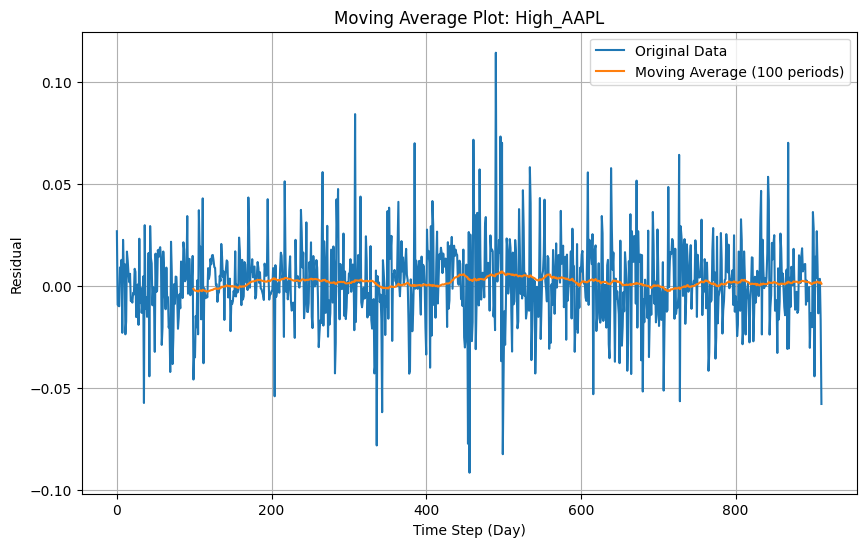

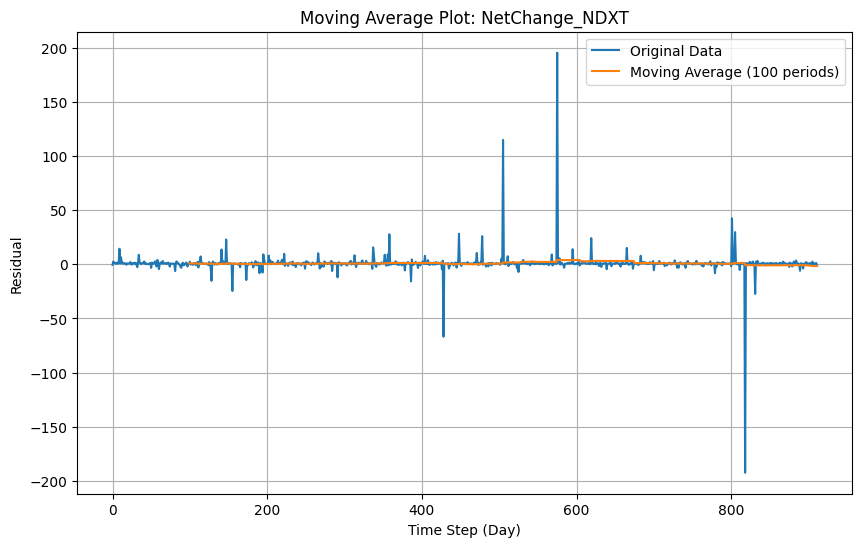

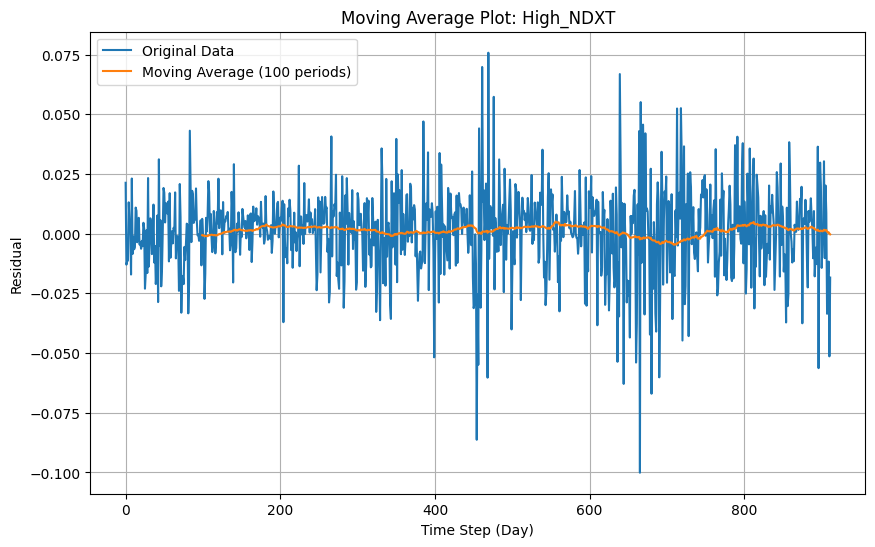

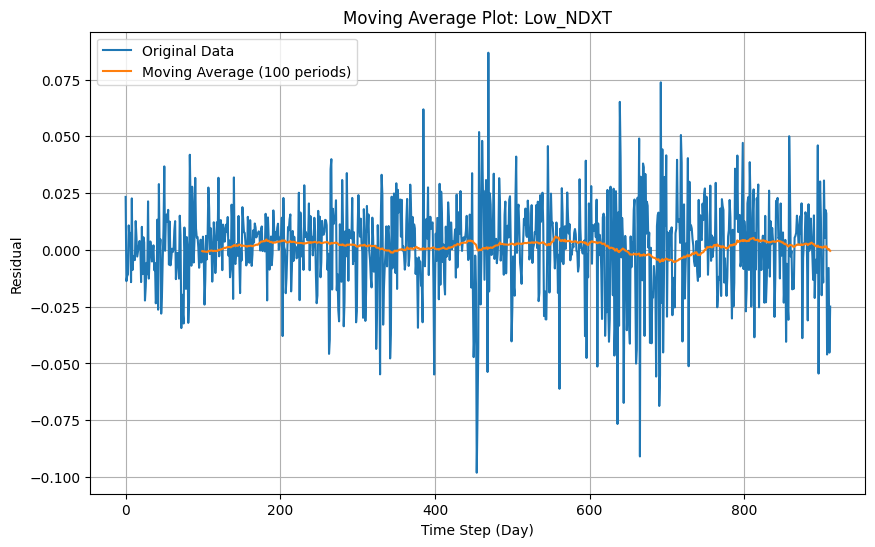

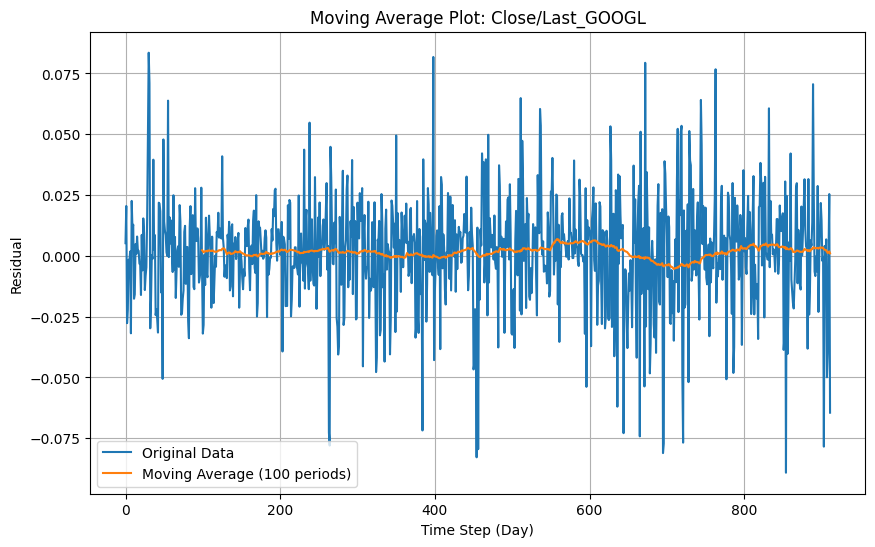

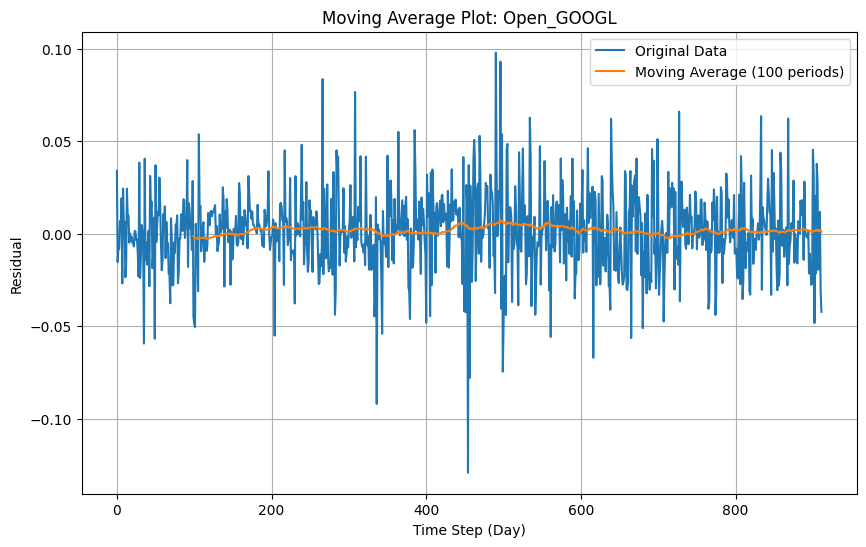

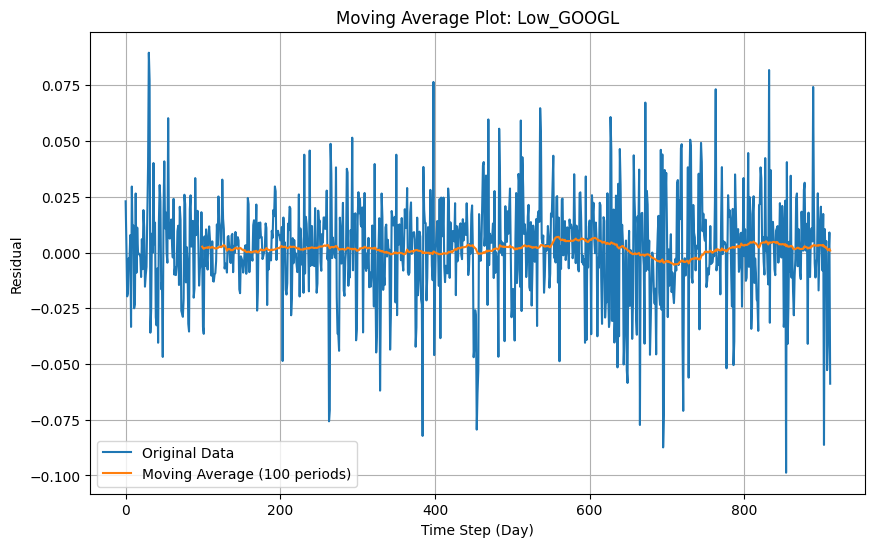

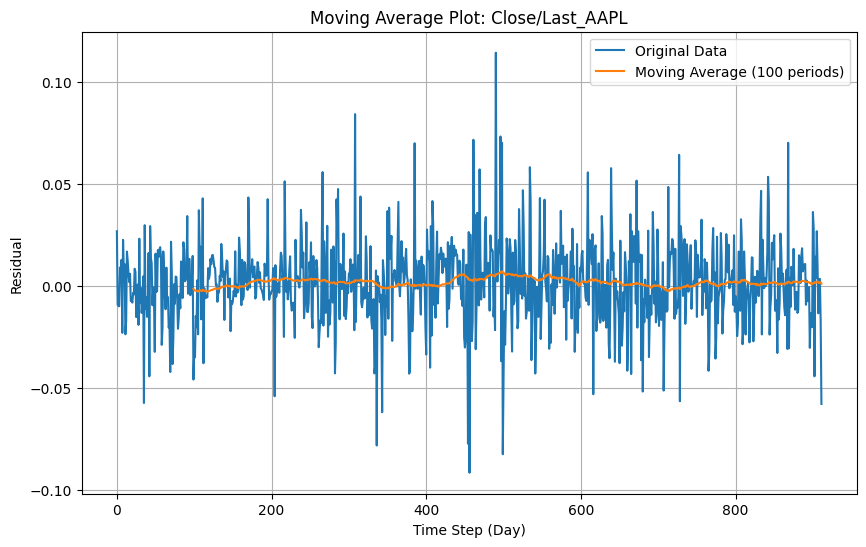

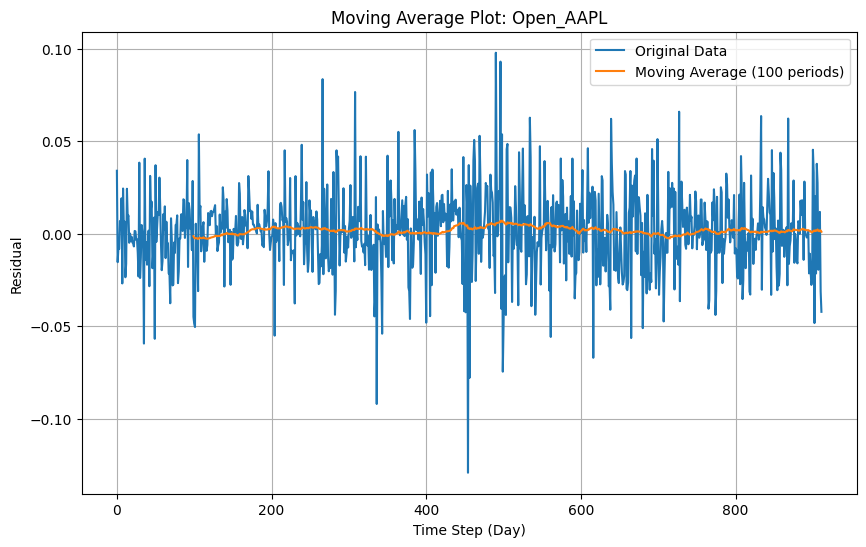

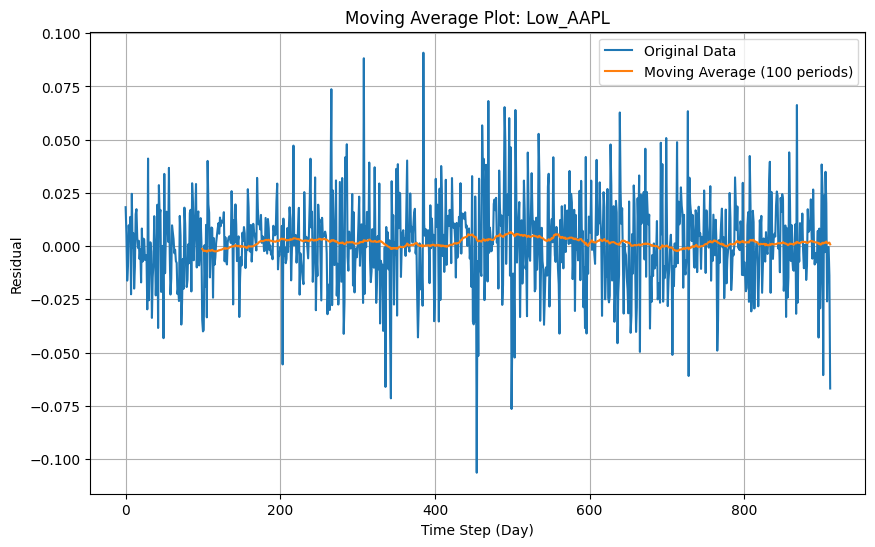

In [ ]:
window_size = 100

col_names = col_names[1:]

for col in col_names:
    newColName = col + '_move_avg'
    resdata[newColName] = (resdata[col]/mainData[col][1:].values).rolling(window=window_size).mean()


    plt.figure(figsize=(10, 6))
    plt.plot(resdata.index, resdata[col]/mainData[col][1:].values, label='Original Data')
    plt.plot(resdata.index, resdata[newColName], label=f'Moving Average ({window_size} periods)')
    plt.xlabel('Time Step (Day)')
    plt.ylabel('Residual')
    plt.title('Moving Average Plot: ' + str(col))
    plt.legend()
    plt.grid(True)
    plt.show()